In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.2.0'

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
print("Training set: ", X_train.shape,"\nTesting Set: ", X_test.shape)

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Declaring input shape
model_input_shape = X_train[0].shape

# Declaring Labels
label_values = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Training set:  (50000, 32, 32, 3) 
Testing Set:  (10000, 32, 32, 3)


In [3]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = model_input_shape),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(192, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation= 'softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 192)               3145920   
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 149s 382ms/step - loss: 1.7319 - accuracy: 0.3573 - val_loss: 1.2791 - val_accuracy: 0.5475
Epoch 2/10
391/391 [==============================] - 143s 367ms/step - loss: 1.3208 - accuracy: 0.5270 - val_loss: 1.0949 - val_accuracy: 0.6136
Epoch 3/10
391/391 [==============================] - 135s 346ms/step - loss: 1.1555 - accuracy: 0.5938 - val_loss: 1.0113 - val_accuracy: 0.6483
Epoch 4/10
391/391 [==============================] - 139s 355ms/step - loss: 1.0520 - accuracy: 0.6324 - val_loss: 0.9604 - val_accuracy: 0.6631
Epoch 5/10
391/391 [==============================] - 133s 339ms/step - loss: 0.9720 - accuracy: 0.6632 - val_loss: 0.9171 - val_accuracy: 0.6782
Epoch 6/10
391/391 [==============================] - 131s 334ms/step - loss: 0.9035 - accuracy: 0.6862 - val_loss: 0.8917 - val_accuracy: 0.6890
Epoch 7/10
391/391 [==============================] - 132s 337ms/step - loss: 0.8454 - accuracy: 0.7032 - val_loss: 0.8892 -

In [10]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.8633 - accuracy: 0.7042


[0.8633368015289307, 0.704200029373169]

In [7]:
!mkdir -p saved_model
model.save('saved_model/my_CNN_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_CNN_model\assets


In [8]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history['accuracy'])
    plt.plot(epoch_range, history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history['loss'])
    plt.plot(epoch_range, history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

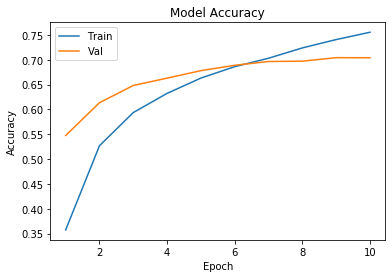

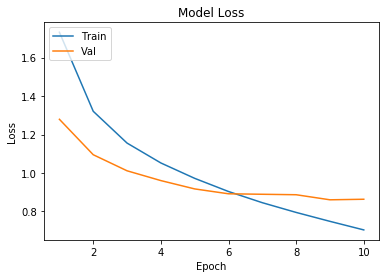

In [9]:
plot_learningCurve(history.history, 10)